In [1]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install webdriver_manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

## 스타벅스 크롤링

In [47]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
starbucks_dict = {}
name = []

def get_article():
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.get("https://www.starbucks.co.kr/store/store_map.do")

    wait = WebDriverWait(driver, 10)

    # 1) '지역 검색' 클릭
    el = wait.until(
        EC.presence_of_element_located((By.XPATH, "//a[normalize-space()='지역 검색']"))
    )
    driver.execute_script("arguments[0].click();", el)

    # 2) 서울 클릭 (sidocd=01)
    seoul = wait.until(
        EC.presence_of_element_located(
            (By.XPATH, "//a[contains(@class,'set_sido_cd_btn') and @data-sidocd='01']")
        )
    )
    driver.execute_script("arguments[0].scrollIntoView({block:'center'});", seoul)
    driver.execute_script("arguments[0].click();", seoul)

    # 3) 구/군 목록 중 '전체'를 정확히 클릭 (기존 XPATH는 여러 개를 잡을 수 있음)
    gugun_btns = wait.until(
        EC.presence_of_all_elements_located(
            (By.CSS_SELECTOR, "a.set_gugun_cd_btn[data-sidocd='01']")
        )
    )
    all_data = next(b for b in gugun_btns if b.text.strip() == "전체")
    driver.execute_script("arguments[0].scrollIntoView({block:'center'});", all_data)
    driver.execute_script("arguments[0].click();", all_data)

    # 4) 매장 li 로딩될 때까지 대기 후 수집
    wait.until(
        EC.presence_of_all_elements_located(
            (By.CSS_SELECTOR, "ul.quickSearchResultBoxSidoGugun li.quickResultLstCon")
        )
    )
    wait.until(
        EC.presence_of_element_located(
            (By.CSS_SELECTOR, "ul.quickSearchResultBoxSidoGugun li.quickResultLstCon p.result_details")
        )
    )

    stores = driver.find_elements(
        By.CSS_SELECTOR, "ul.quickSearchResultBoxSidoGugun li.quickResultLstCon"
    )

    for store in stores:
        driver.execute_script("arguments[0].scrollIntoView({block:'center'});", store)
        time.sleep(0.05)  # 아주 짧게만
        store_name = store.find_element(By.CSS_SELECTOR, "strong").get_attribute("data-name")
        details = store.find_element(By.CSS_SELECTOR, "p.result_details").text.strip()

        # details 첫 줄이 주소인 경우가 많아서 주소만 쓰고 싶으면 아래처럼
        addr = details.splitlines()[0].strip() if details else ""

        print(store_name, addr)
        starbucks_dict[store_name] = addr

    driver.quit()
    return starbucks_dict

get_article()


역삼아레나빌딩 서울특별시 강남구 언주로 425 (역삼동)
논현역사거리 서울특별시 강남구 강남대로 538 (논현동)
신사역성일빌딩 서울특별시 강남구 강남대로 584 (논현동)
국기원사거리 서울특별시 강남구 테헤란로 125 (역삼동)
대치재경빌딩 서울특별시 강남구 남부순환로 2947 (대치동)
봉은사역 서울특별시 강남구 봉은사로 619 (삼성동)
압구정윤성빌딩 서울특별시 강남구 논현로 834 (신사동)
코엑스별마당 서울특별시 강남구 영동대로 513 (삼성동)
삼성역섬유센터R 서울특별시 강남구 테헤란로 518 (대치동)
압구정R 서울특별시 강남구 언주로 861 (신사동)
수서역R 서울특별시 강남구 광평로 281 (수서동)
양재강남빌딩R 서울특별시 강남구 남부순환로 2621 (도곡동)
선릉동신빌딩R 서울특별시 강남구 테헤란로 409 (삼성동)
봉은사로선정릉 서울특별시 강남구 봉은사로 446 (삼성동)
강남오거리 서울특별시 강남구 봉은사로2길 39 (역삼동)
스타필드코엑스몰R 서울특별시 강남구 영동대로 513 (삼성동) 코엑스 A106호
강남구청정문 서울특별시 강남구 학동로 419 (청담동)
도곡공원 서울특별시 강남구 도곡로 205 (역삼동)
강남R 서울특별시 강남구 강남대로 390 (역삼동)
대치은마사거리 서울특별시 강남구 도곡로 457 (대치동)
청담영동대로 서울특별시 강남구 영동대로 720 (청담동)
압구정 서울특별시 강남구 압구정로30길 17 (신사동)
신사가로수 서울특별시 강남구 가로수길 59
청담스타R 서울특별시 강남구 도산대로57길 24 (청담동)
강남우성 서울특별시 강남구 강남대로 328 (역삼동)
학동사거리 서울특별시 강남구 도산대로 328 (논현동)
대치사거리 서울특별시 강남구 삼성로 402 (대치동)
포스코사거리 서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩
을지병원사거리 서울특별시 강남구 논현로 752 (논현동,구산빌딩)
신사역 서울특별시 강남구 도산대로 108 (논현동) 렉스타워
도곡역 서울특별시 강남구 남부순환로 2909 (대치동)
서울

{'역삼아레나빌딩': '서울특별시 강남구 언주로 425 (역삼동)',
 '논현역사거리': '서울특별시 강남구 강남대로 538 (논현동)',
 '신사역성일빌딩': '서울특별시 강남구 강남대로 584 (논현동)',
 '국기원사거리': '서울특별시 강남구 테헤란로 125 (역삼동)',
 '대치재경빌딩': '서울특별시 강남구 남부순환로 2947 (대치동)',
 '봉은사역': '서울특별시 강남구 봉은사로 619 (삼성동)',
 '압구정윤성빌딩': '서울특별시 강남구 논현로 834 (신사동)',
 '코엑스별마당': '서울특별시 강남구 영동대로 513 (삼성동)',
 '삼성역섬유센터R': '서울특별시 강남구 테헤란로 518 (대치동)',
 '압구정R': '서울특별시 강남구 언주로 861 (신사동)',
 '수서역R': '서울특별시 강남구 광평로 281 (수서동)',
 '양재강남빌딩R': '서울특별시 강남구 남부순환로 2621 (도곡동)',
 '선릉동신빌딩R': '서울특별시 강남구 테헤란로 409 (삼성동)',
 '봉은사로선정릉': '서울특별시 강남구 봉은사로 446 (삼성동)',
 '강남오거리': '서울특별시 강남구 봉은사로2길 39 (역삼동)',
 '스타필드코엑스몰R': '서울특별시 강남구 영동대로 513 (삼성동) 코엑스 A106호',
 '강남구청정문': '서울특별시 강남구 학동로 419 (청담동)',
 '도곡공원': '서울특별시 강남구 도곡로 205 (역삼동)',
 '강남R': '서울특별시 강남구 강남대로 390 (역삼동)',
 '대치은마사거리': '서울특별시 강남구 도곡로 457 (대치동)',
 '청담영동대로': '서울특별시 강남구 영동대로 720 (청담동)',
 '압구정': '서울특별시 강남구 압구정로30길 17 (신사동)',
 '신사가로수': '서울특별시 강남구 가로수길 59',
 '청담스타R': '서울특별시 강남구 도산대로57길 24 (청담동)',
 '강남우성': '서울특별시 강남구 강남대로 328 (역삼동)',
 '학동사거리': '서울특별시 강남구 도산대로 3

In [52]:
스타벅스지점=list(starbucks_dict.keys())

In [53]:
스타벅스지점

['역삼아레나빌딩',
 '논현역사거리',
 '신사역성일빌딩',
 '국기원사거리',
 '대치재경빌딩',
 '봉은사역',
 '압구정윤성빌딩',
 '코엑스별마당',
 '삼성역섬유센터R',
 '압구정R',
 '수서역R',
 '양재강남빌딩R',
 '선릉동신빌딩R',
 '봉은사로선정릉',
 '강남오거리',
 '스타필드코엑스몰R',
 '강남구청정문',
 '도곡공원',
 '강남R',
 '대치은마사거리',
 '청담영동대로',
 '압구정',
 '신사가로수',
 '청담스타R',
 '강남우성',
 '학동사거리',
 '대치사거리',
 '포스코사거리',
 '을지병원사거리',
 '신사역',
 '도곡역',
 '서울세관사거리',
 '청담사거리',
 '한티역',
 '역삼초교사거리',
 '코엑스몰',
 '가로수길',
 '역삼대로',
 '역삼포스코',
 '강남대로',
 '청담',
 '삼성교',
 '학동역',
 '대치',
 '신세계푸드마켓도곡',
 '삼성',
 '선릉세화빌딩',
 '압구정역',
 '압구정로',
 '구역삼사거리',
 '큰길타워',
 '강남구청역',
 '대치역',
 '포이',
 '아크플레이스',
 '학여울역',
 '선정릉역',
 '삼성현대힐',
 'GS타워',
 '압구정미소',
 '선릉역',
 '코엑스사거리',
 '역삼럭키',
 '신압구정',
 '아크로힐스논현',
 '강남비젼타워',
 '압구정로데오역',
 '르네상스사거리',
 '포스코',
 '선릉로',
 '논현힐탑',
 '도산가로수길',
 '매봉역',
 '청담역6번출구',
 '대치한티',
 '개포동',
 '수서역사거리',
 '코엑스아셈타워',
 '강남차여성병원',
 '센터필드R',
 '도산사거리',
 '강남세곡',
 '대치삼성',
 '언주역',
 '강남파이낸스센터',
 '강남역신분당역사',
 '삼성역',
 '테헤란로아남타워',
 '강남논현',
 '삼성동',
 '리저브도산',
 '압구정역사3번출구',
 '청담역',
 '압구정현대아파트',
 '강남청담빌딩',
 '역삼이마트',
 '케이스퀘어강남',
 '강남세곡DT',
 '미아뉴타운',
 

In [54]:
스타벅스주소=list(starbucks_dict.values())

In [59]:
자치구명=[]
for i in 스타벅스주소:
    자치구명.append(i[6:9])

In [60]:
자치구명

['강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',


In [92]:
스타벅스주소

['서울특별시 강남구 언주로 425 (역삼동)',
 '서울특별시 강남구 강남대로 538 (논현동)',
 '서울특별시 강남구 강남대로 584 (논현동)',
 '서울특별시 강남구 테헤란로 125 (역삼동)',
 '서울특별시 강남구 남부순환로 2947 (대치동)',
 '서울특별시 강남구 봉은사로 619 (삼성동)',
 '서울특별시 강남구 논현로 834 (신사동)',
 '서울특별시 강남구 영동대로 513 (삼성동)',
 '서울특별시 강남구 테헤란로 518 (대치동)',
 '서울특별시 강남구 언주로 861 (신사동)',
 '서울특별시 강남구 광평로 281 (수서동)',
 '서울특별시 강남구 남부순환로 2621 (도곡동)',
 '서울특별시 강남구 테헤란로 409 (삼성동)',
 '서울특별시 강남구 봉은사로 446 (삼성동)',
 '서울특별시 강남구 봉은사로2길 39 (역삼동)',
 '서울특별시 강남구 영동대로 513 (삼성동) 코엑스 A106호',
 '서울특별시 강남구 학동로 419 (청담동)',
 '서울특별시 강남구 도곡로 205 (역삼동)',
 '서울특별시 강남구 강남대로 390 (역삼동)',
 '서울특별시 강남구 도곡로 457 (대치동)',
 '서울특별시 강남구 영동대로 720 (청담동)',
 '서울특별시 강남구 압구정로30길 17 (신사동)',
 '서울특별시 강남구 가로수길 59',
 '서울특별시 강남구 도산대로57길 24 (청담동)',
 '서울특별시 강남구 강남대로 328 (역삼동)',
 '서울특별시 강남구 도산대로 328 (논현동)',
 '서울특별시 강남구 삼성로 402 (대치동)',
 '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩',
 '서울특별시 강남구 논현로 752 (논현동,구산빌딩)',
 '서울특별시 강남구 도산대로 108 (논현동) 렉스타워',
 '서울특별시 강남구 남부순환로 2909 (대치동)',
 '서울특별시 강남구 언주로 650 (논현동) 한국건설기술인협회',
 '서울특별시 강남구 도산대로 458 (청담동) 리츠타워',
 '서울특별시 강

In [99]:
import pandas as pd
df_star=pd.DataFrame({"자치구명":자치구명,"스타벅스지점":스타벅스지점,"스타벅스주소":스타벅스주소})
df_star.to_csv("starbucks.csv",encoding='cp949')

In [1]:
import pandas as pd
df_star=pd.read_csv("starbucks.csv",encoding='cp949')
df_star

,Unnamed: 0,자치구명,스타벅스지점,스타벅스주소
0,0,강남구,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동)
1,1,강남구,논현역사거리,서울특별시 강남구 강남대로 538 (논현동)
2,2,강남구,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동)
3,3,강남구,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동)
4,4,강남구,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동)
...,...,...,...,...
663,663,중랑구,면목역,서울특별시 중랑구 면목로 403 (면목동)
664,664,중랑구,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
665,665,중랑구,망우동,서울특별시 중랑구 망우로 407 (망우동)
666,666,중랑구,양원역,서울특별시 중랑구 양원역로10길 3 (망우동)


In [4]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  668 non-null    int64 
 1   자치구명        668 non-null    object
 2   스타벅스지점      668 non-null    object
 3   스타벅스주소      668 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.0+ KB


In [6]:
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

In [7]:
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_data=pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울시 부동산 실거래가 정보(2022~2025) (1).csv",encoding="cp949")

C:\Users\User\AppData\Local\Temp\ipykernel_27796\3780949426.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data=pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울시 부동산 실거래가 정보(2022~2025) (1).csv",encoding="cp949")


In [23]:
df_data

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235666,2022,11110,종로구,18600,신영동,NaN,NaN,NaN,NaN,NaN,...,67000,49.50,222.00,NaN,NaN,NaN,2005.0,단독다가구,NaN,NaN
235667,2022,11290,성북구,13300,정릉동,1.0,대지,260.0,10.0,진안빌라A(260-10),...,35000,57.95,42.40,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN
235668,2022,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,110000,147.12,182.00,NaN,NaN,NaN,1968.0,단독다가구,NaN,NaN
235669,2022,11290,성북구,13300,정릉동,1.0,대지,260.0,10.0,진안빌라A(260-10),...,35000,57.95,42.40,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN


In [16]:
df_all=pd.merge(df_star,df_data,on="자치구명",how="right")
df_all


,Unnamed: 0,자치구명,스타벅스지점,스타벅스주소,접수연도,자치구코드,법정동코드,법정동명,지번구분,지번구분명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,204.0,도봉구,창동이마트,서울특별시 도봉구 노해로65길 4 (창동),2025,11320,10600,방학동,1.0,대지,...,14800,37.66,16.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,205.0,도봉구,도봉구청,서울특별시 도봉구 마들로 665 (도봉동),2025,11320,10600,방학동,1.0,대지,...,14800,37.66,16.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
2,206.0,도봉구,쌍문,서울특별시 도봉구 도봉로 494 (창동),2025,11320,10600,방학동,1.0,대지,...,14800,37.66,16.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
3,207.0,도봉구,쌍문도봉로,서울특별시 도봉구 도봉로 444 (창동),2025,11320,10600,방학동,1.0,대지,...,14800,37.66,16.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
4,208.0,도봉구,도봉로DT,서울특별시 도봉구 도봉로 635 (쌍문동),2025,11320,10600,방학동,1.0,대지,...,14800,37.66,16.0,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588992,336.0,서초구,서이초교사거리,서울특별시 서초구 사임당로 143 (서초동),2022,11650,10300,우면동,1.0,대지,...,42300,52.47,0.0,6.0,NaN,NaN,1994.0,아파트,NaN,NaN
5588993,337.0,서초구,동작대로,서울특별시 서초구 동작대로 72 (방배동),2022,11650,10300,우면동,1.0,대지,...,42300,52.47,0.0,6.0,NaN,NaN,1994.0,아파트,NaN,NaN
5588994,338.0,서초구,강남르피에드,"서울특별시 서초구 서운로 136 (서초동), 1층 1호,2호,3호,4호",2022,11650,10300,우면동,1.0,대지,...,42300,52.47,0.0,6.0,NaN,NaN,1994.0,아파트,NaN,NaN
5588995,339.0,서초구,대륭서초타워,서울특별시 서초구 강남대로 327 (서초동),2022,11650,10300,우면동,1.0,대지,...,42300,52.47,0.0,6.0,NaN,NaN,1994.0,아파트,NaN,NaN


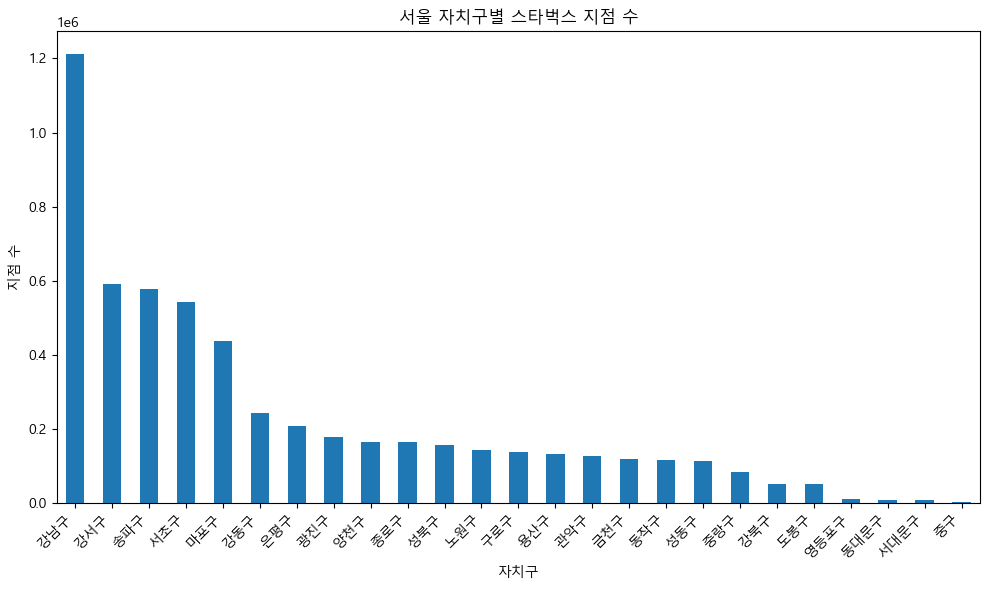

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 구별 집계
cnt = (df_all.groupby('자치구명')
         .size()
         .sort_values(ascending=False))

# 2) 시각화
plt.figure(figsize=(10, 6))
cnt.plot(kind='bar')
plt.title('서울 자치구별 스타벅스 지점 수')
plt.xlabel('자치구')
plt.ylabel('지점 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
df_all.isnull().sum()

Unnamed: 0            30737
자치구명                      1
스타벅스지점                30737
스타벅스주소                30737
접수연도                      0
자치구코드                     0
법정동코드                     0
법정동명                      0
지번구분                 224976
지번구분명                224976
본번                   224896
부번                   224896
건물명                  224921
계약일                       0
물건금액(만원)                  0
건물면적(㎡)                   0
토지면적(㎡)              118158
층                    223632
권리구분                5543124
취소일                 5276325
건축년도                  33359
건물용도                      0
신고구분                   6522
신고한 개업공인중개사 시군구명     848056
dtype: int64

In [24]:
df_all.columns


Index(['Unnamed: 0', '자치구명', '스타벅스지점', '스타벅스주소', '접수연도', '자치구코드', '법정동코드',
       '법정동명', '지번구분', '지번구분명', '본번', '부번', '건물명', '계약일', '물건금액(만원)',
       '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일', '건축년도', '건물용도', '신고구분',
       '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [35]:
pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


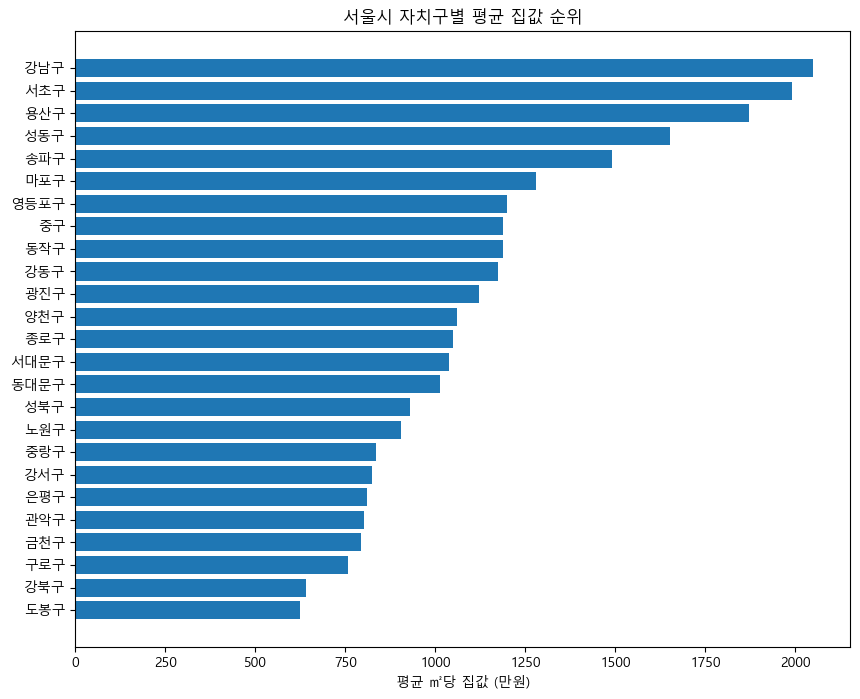

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 필요한 컬럼만 선택
df = df_all[[
    "자치구명",
    "물건금액(만원)",
    "건물면적(㎡)"
]]

# 2️⃣ 건물면적이 0이거나 없는 행 제거
df = df[df["건물면적(㎡)"] > 0]

# 3️⃣ ㎡당 집값 계산
df["㎡당가격"] = df["물건금액(만원)"] / df["건물면적(㎡)"]

# 4️⃣ 자치구별 평균 ㎡당 집값 계산
gu_avg_price = (
    df.groupby("자치구명")["㎡당가격"]
      .mean()
      .reset_index()
)

# 5️⃣ 평균 집값 기준으로 내림차순 정렬 (순위)
gu_avg_price = gu_avg_price.sort_values("㎡당가격", ascending=False)

# 6️⃣ 순위 그래프 (가로 bar 차트)
plt.figure(figsize=(10, 8))
plt.barh(
    gu_avg_price["자치구명"],
    gu_avg_price["㎡당가격"]
)

plt.xlabel("평균 ㎡당 집값 (만원)")
plt.title("서울시 자치구별 평균 집값 순위")

# 1위가 위로 오도록 뒤집기
plt.gca().invert_yaxis()

plt.show()


📌 상관계수: 0.6540166208491123
    자치구명         ㎡당가격  스타벅스지점
0    강남구  2049.491400      98
1    강동구  1173.741174      20
2    강북구   639.855046       7
3    강서구   824.388576      32
4    관악구   801.454595      14
5    광진구  1121.519599      23
6    구로구   756.248243      13
7    금천구   792.540138      15
8    노원구   905.446937      15
9    도봉구   624.974889       7
10  동대문구  1012.809236       0
11   동작구  1187.297041      13
12   마포구  1280.766799      38
13  서대문구  1037.631380       0
14   서초구  1989.272070      56
15   성동구  1650.968213      15
16   성북구   928.354922      17
17   송파구  1491.540527      39
18   양천구  1058.806064      17
19  영등포구  1200.212447       0
20   용산구  1870.107188      25
21   은평구   809.415698      16
22   종로구  1050.283782      43
23    중구  1187.888804       0
24   중랑구   834.819311      10


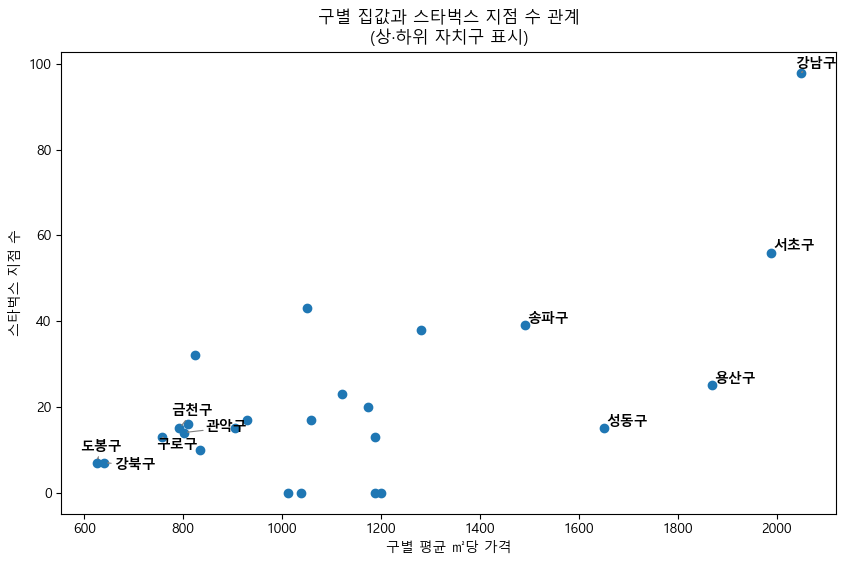

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text 
# 1️⃣ df_all에서 필요한 컬럼만 선택
df = df_all[[
    "자치구명",
    "물건금액(만원)",
    "건물면적(㎡)",
    "스타벅스지점"
]]

# 2️⃣ 건물면적이 0이거나 없는 행 제거
df = df[df["건물면적(㎡)"] > 0]

# 3️⃣ ㎡당 가격 계산
df["㎡당가격"] = df["물건금액(만원)"] / df["건물면적(㎡)"]

# 4️⃣ 구별 평균 ㎡당 가격
price_by_gu = (
    df.groupby("자치구명")["㎡당가격"]
      .mean()
      .reset_index()
)

# 5️⃣ 구별 스타벅스 지점 수 (중복 제거)
starbucks_by_gu = (
    df.groupby("자치구명")["스타벅스지점"]
      .nunique()
      .reset_index()
)

# 6️⃣ 두 결과 합치기
result = pd.merge(price_by_gu, starbucks_by_gu, on="자치구명")

# 7️⃣ 상관계수 계산
corr = result["㎡당가격"].corr(result["스타벅스지점"])
print("📌 상관계수:", corr)
print(result)

plt.figure(figsize=(10, 6))
plt.scatter(result["㎡당가격"], result["스타벅스지점"])

# 상위 5개 + 하위 5개 구 선택
top5 = result.sort_values("㎡당가격", ascending=False).head(5)
bottom5 = result.sort_values("㎡당가격", ascending=True).head(5)
highlight = pd.concat([top5, bottom5])

texts = []  # ✅ (추가) 텍스트 객체 모아두기

for _, row in highlight.iterrows():
    # ✅ annotate 대신 text를 저장 (겹침 조정 대상)
    texts.append(
        plt.text(
            row["㎡당가격"], row["스타벅스지점"],
            row["자치구명"],
            fontsize=10,
            fontweight="bold"
        )
    )

# ✅ (추가) 라벨 겹침 자동 조정 + 화살표 연결(선택)
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color="0.5", lw=0.8)
)  # 겹침 최소화 [web:6][web:23]

plt.xlabel("구별 평균 ㎡당 가격")
plt.ylabel("스타벅스 지점 수")
plt.title("구별 집값과 스타벅스 지점 수 관계\n(상·하위 자치구 표시)")
plt.show()

In [39]:
df_store=pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\소상공인시장진흥공단_상가(상권)정보_서울_202510.csv",encoding="cp949")
df_store

,열1,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220802495368,영어독서클럽영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85631,...,1.150000e+24,세신그린코아빌딩,서울특별시 강서구 공항대로41길 51,157930,7586,NaN,NaN,NaN,126.845780,37.560238
1,MA010120220806509545,하루달곰,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,1.140000e+24,비콘드림힐,서울특별시 노원구 상계로1길 82-14,139816,1693,301,NaN,NaN,127.062003,37.659314
2,MA010120220804193917,양산박,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.170000e+24,명칭없음,서울특별시 서초구 언남11길 34-1,137895,6776,NaN,1,NaN,127.043051,37.475637
3,MA010120220805914597,으뜸공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1.140000e+24,NaN,서울특별시 마포구 숭문길 182,121870,4122,NaN,1,NaN,126.946651,37.554524
4,MA010120220814395227,세선티알엠,NaN,N1,시설관리·임대,N103,조경·유지,N10301,조경 유지·관리 서비스업,N74300,...,1.160000e+24,NaN,서울특별시 관악구 호암로 538,151929,8821,NaN,NaN,NaN,126.931669,37.465579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536257,MA0101202306A0044326,신인류,NaN,I2,음식,I211,주점,I21104,요리 주점,I56219,...,1.110000e+24,NaN,서울특별시 종로구 종로 72-1,110122,3189,NaN,4,NaN,126.985466,37.569952
536258,MA0101202306A0026957,휴,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.170000e+24,역삼푸르지오시티,서울특별시 강남구 논현로85길 52,135923,6235,NaN,2,NaN,127.033813,37.498192
536259,MA0101202306A0041780,참기름짜는육회집,NaN,I2,음식,I201,한식,I20108,소고기 구이/찜,I56113,...,1.170000e+24,NaN,서울특별시 송파구 백제고분로48길 19,138832,5632,NaN,1,NaN,127.115414,37.511187
536260,MA0101202306A0033595,신사공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1.170000e+24,NaN,서울특별시 강남구 논현로157길 18,135891,6032,NaN,1,NaN,127.026663,37.522512


In [40]:
import pandas as pd

path = r"C:\Sesac_Workspace\sesac_data_analysis_workspace\data\소상공인시장진흥공단_상가(상권)정보_서울_202510.csv"

df_store = pd.read_csv(path, encoding="cp949")

df_food = df_store[df_store["상권업종대분류명"].astype(str).str.strip().eq("음식")]

out_path = r"C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울_202510_음식.csv"
df_food.to_csv(out_path, index=False, encoding="utf-8-sig")


In [43]:
df_food=pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울_202510_음식.csv",encoding="utf-8")
df_food

,열1,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220806509545,하루달곰,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,1.140000e+24,비콘드림힐,서울특별시 노원구 상계로1길 82-14,139816,1693,301,NaN,NaN,127.062003,37.659314
1,MA010120220804193917,양산박,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.170000e+24,명칭없음,서울특별시 서초구 언남11길 34-1,137895,6776,NaN,1,NaN,127.043051,37.475637
2,MA010120220806543796,마녀김밥대치점,청담동,I2,음식,I210,기타 간이,I21007,김밥/만두/분식,I56194,...,1.170000e+24,롯데캐슬,서울특별시 강남구 삼성로85길 11,135841,6195,NaN,1,NaN,127.056186,37.504599
3,MA010120220813096508,육갑식당,NaN,I2,음식,I201,한식,I20107,돼지고기 구이/찜,I56113,...,1.170000e+24,NaN,서울특별시 서초구 방배중앙로 166,137829,6557,NaN,1,NaN,126.986543,37.493835
4,MA010120220809815529,옛날짜장,NaN,I2,음식,I202,중식,I20201,중국집,I56121,...,1.120000e+24,NaN,서울특별시 광진구 긴고랑로9길 41,143901,4908,NaN,NaN,NaN,127.081575,37.565248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135269,MA0101202306A0008096,명성웃음꼬치활짝,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.160000e+24,NaN,서울특별시 동작구 신대방2길 2-7,156853,7067,NaN,지,NaN,126.912947,37.487749
135270,MA0101202306A0044326,신인류,NaN,I2,음식,I211,주점,I21104,요리 주점,I56219,...,1.110000e+24,NaN,서울특별시 종로구 종로 72-1,110122,3189,NaN,4,NaN,126.985466,37.569952
135271,MA0101202306A0026957,휴,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.170000e+24,역삼푸르지오시티,서울특별시 강남구 논현로85길 52,135923,6235,NaN,2,NaN,127.033813,37.498192
135272,MA0101202306A0041780,참기름짜는육회집,NaN,I2,음식,I201,한식,I20108,소고기 구이/찜,I56113,...,1.170000e+24,NaN,서울특별시 송파구 백제고분로48길 19,138832,5632,NaN,1,NaN,127.115414,37.511187


In [44]:
df_food.columns

Index(['열1', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드', '시도명', '시군구코드',
       '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명',
       '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지', '건물부번지', '건물관리번호',
       '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보', '호정보', '경도', '위도'],
      dtype='object')

In [46]:
# 구별 음식점 수
gu_food_count = (
    df_food.groupby("시군구명")
           .size()
           .reset_index(name="음식점수")
)

# 음식점 수 기준 내림차순 정렬
gu_food_count = gu_food_count.sort_values("음식점수", ascending=False)

print(gu_food_count.head())


    시군구명   음식점수
0    강남구  12236
12   마포구   8954
17   송파구   8005
19  영등포구   7541
3    강서구   6771


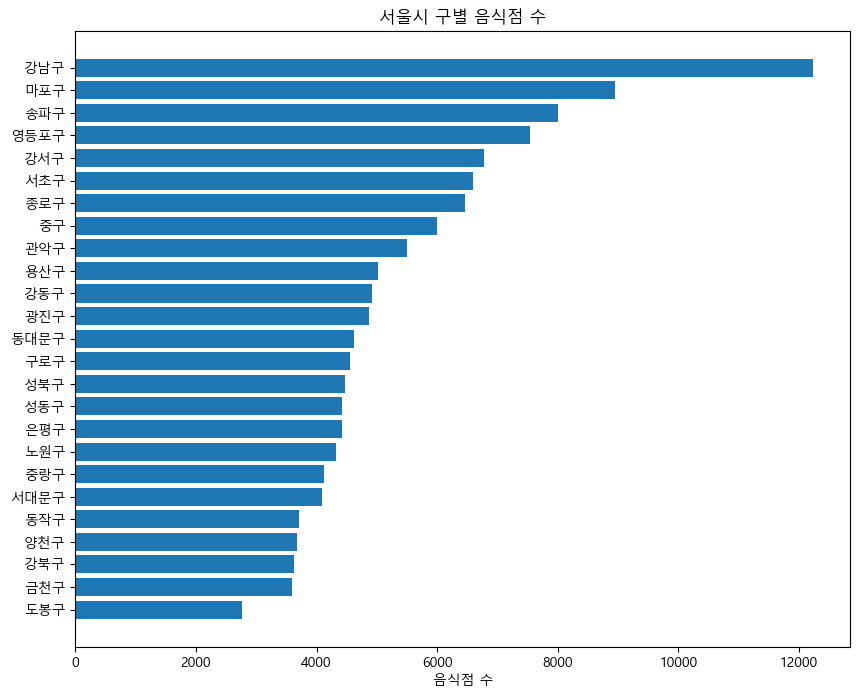

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(
    gu_food_count["시군구명"],
    gu_food_count["음식점수"]
)

plt.xlabel("음식점 수")
plt.title("서울시 구별 음식점 수")
plt.gca().invert_yaxis()   # 1위가 위로
plt.show()


In [48]:
dong_food_count = (
    df_food.groupby("법정동명")
           .size()
           .reset_index(name="음식점수")
)

dong_food_count = dong_food_count.sort_values("음식점수", ascending=False)

print(dong_food_count.head())


    법정동명  음식점수
272  역삼동  3180
239  신림동  2732
206  서초동  2572
171  봉천동  2526
31   구로동  2398


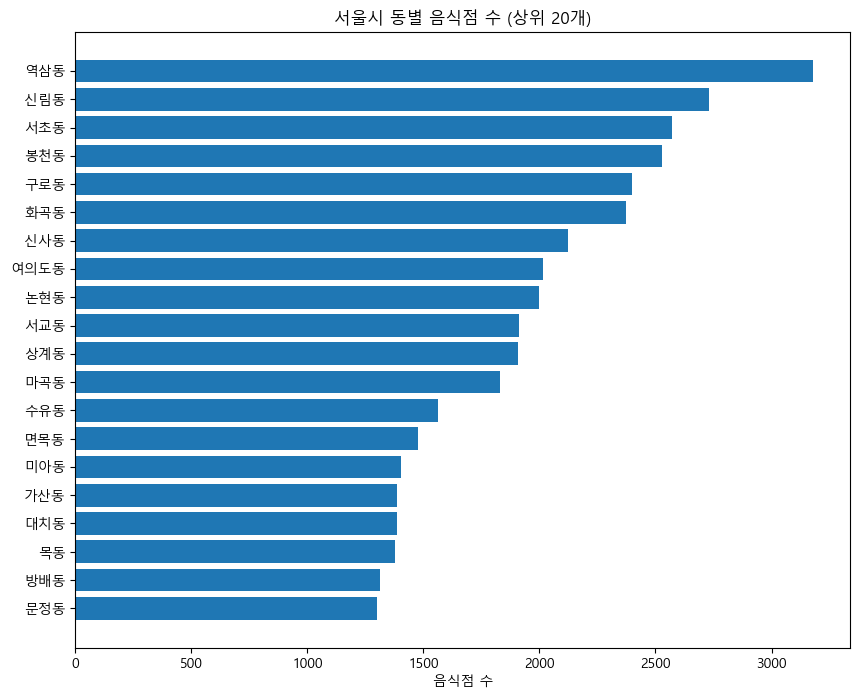

In [49]:
top20_dong = dong_food_count.head(20)

plt.figure(figsize=(10, 8))
plt.barh(
    top20_dong["법정동명"],
    top20_dong["음식점수"]
)

plt.xlabel("음식점 수")
plt.title("서울시 동별 음식점 수 (상위 20개)")
plt.gca().invert_yaxis()
plt.show()
